In the relational plot tutorial we saw how to use different visual representations to show the relationship between multiple variables in a dataset. In the examples, we focused on cases where the main relationship was between two numerical variables. If one of the main variables is “categorical” (divided into discrete groups) it may be helpful to use a more specialized approach to visualization.

In seaborn, there are several different ways to visualize a relationship involving categorical data. Similar to the relationship between relplot() and either scatterplot() or lineplot(), there are two ways to make these plots. There are a number of axes-level functions for plotting categorical data in different ways and a figure-level interface, catplot(), that gives unified higher-level access to them.

Categorical scatterplots:

    stripplot() (with kind="strip"; the default)

    swarmplot() (with kind="swarm")

Categorical distribution plots:

    boxplot() (with kind="box")

    violinplot() (with kind="violin")

    boxenplot() (with kind="boxen")

Categorical estimate plots:

    pointplot() (with kind="point")

    barplot() (with kind="bar")

    countplot() (with kind="count")


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

## 1.Categorical scatterplots

In [2]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


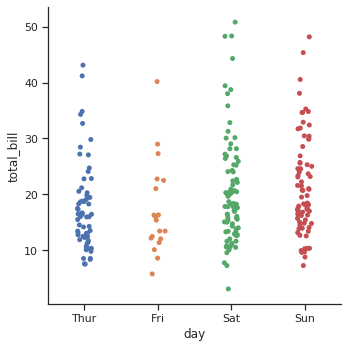

In [4]:
sns.catplot(x="day", y="total_bill", data=tips)

The jitter parameter controls the magnitude of jitter or disables it altogether:

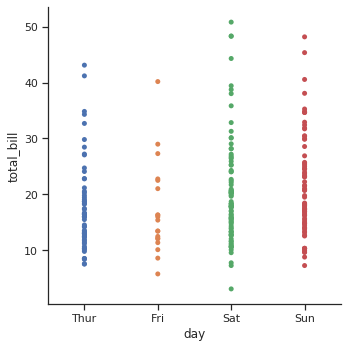

In [5]:
sns.catplot(x="day", y="total_bill", data=tips, jitter=False)

The second approach adjusts the points along the categorical axis using an algorithm that prevents them from overlapping. It can give a better representation of the distribution of observations, although it only works well for relatively small datasets. This kind of plot is sometimes called a “beeswarm” and is drawn in seaborn by swarmplot(), which is activated by setting kind="swarm" in catplot():

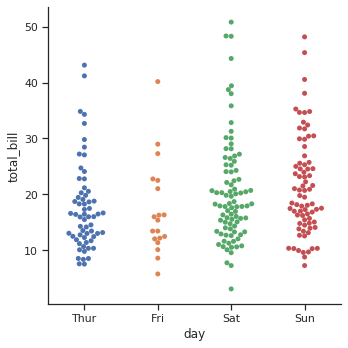

In [6]:
sns.catplot(x="day", y="total_bill", kind="swarm", data=tips)

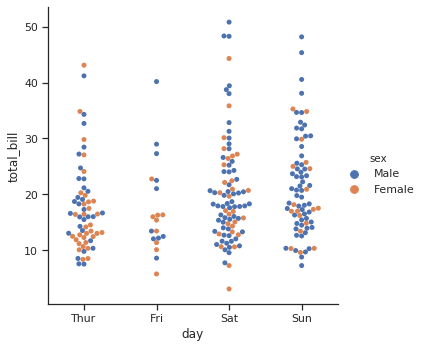

In [7]:
sns.catplot(x="day", y="total_bill", kind="swarm", data=tips, hue="sex")

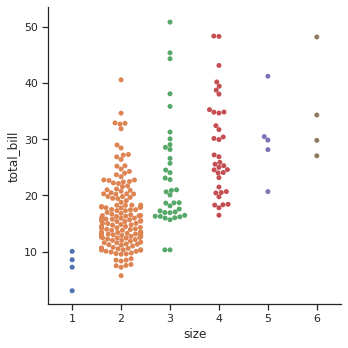

In [8]:
sns.catplot(x="size", y="total_bill", kind="swarm", data=tips)

giving order to x axis.

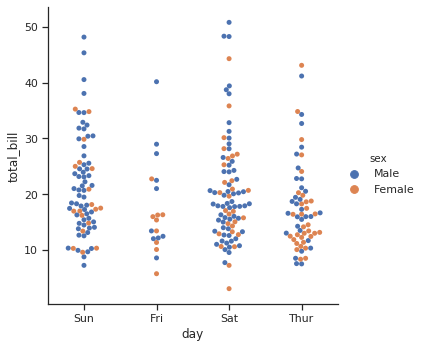

In [10]:
sns.catplot(x="day", y="total_bill", kind="swarm", data=tips, hue="sex", order=["Sun","Fri","Sat","Thur"])

## Distributions of observations within categories

As the size of the dataset grows, categorical scatter plots become limited in the information they can provide about the distribution of values within each category. When this happens, there are several approaches for summarizing the distributional information in ways that facilitate easy comparisons across the category levels.


### Boxplots

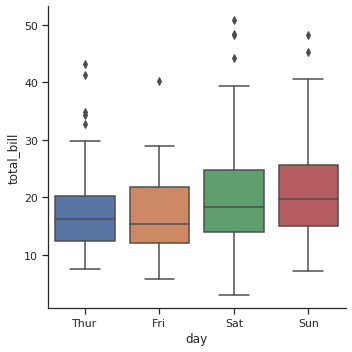

In [6]:
sns.catplot(x="day", y="total_bill", kind="box", data=tips)

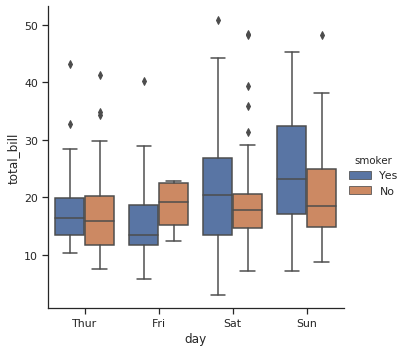

In [7]:
sns.catplot(x="day", y="total_bill", kind="box", data=tips, hue='smoker')

A related function, boxenplot(), draws a plot that is similar to a box plot but optimized for showing more information about the shape of the distribution. It is best suited for larger datasets:

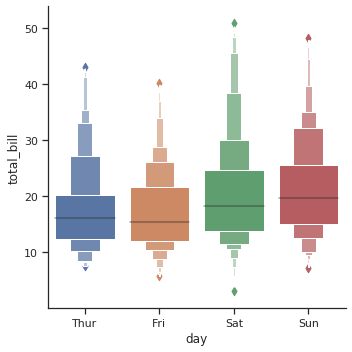

In [8]:
sns.catplot(x="day", y="total_bill", kind="boxen", data=tips)

## Violinplots

A different approach is a violinplot(), which combines a boxplot with the kernel density estimation procedure described in the distributions tutorial:

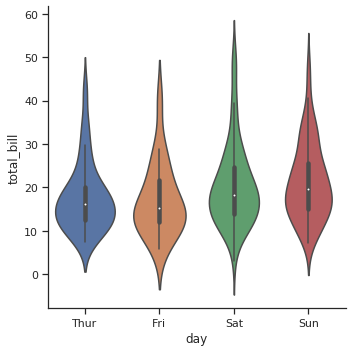

In [9]:
sns.catplot(x='day', y='total_bill', kind='violin', data=tips)

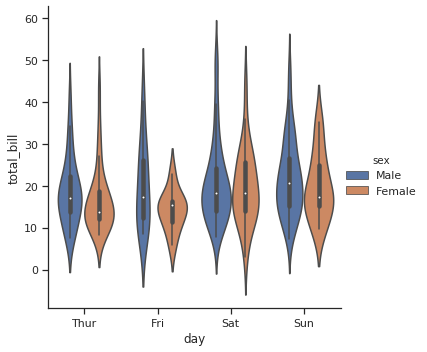

In [11]:
sns.catplot(x='day', y='total_bill', kind='violin',hue='sex', data=tips)

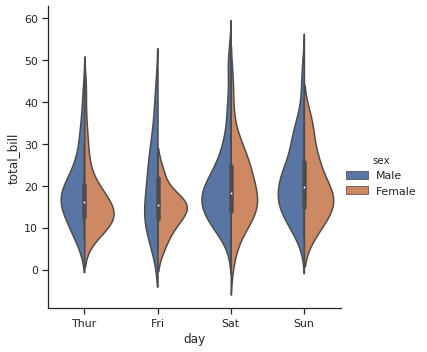

In [13]:
sns.catplot(x='day', y='total_bill', kind='violin',hue='sex',split=True, data=tips)

# Statistical estimation within categories
## Bar plots


In [19]:
titanic = sns.load_dataset("titanic")


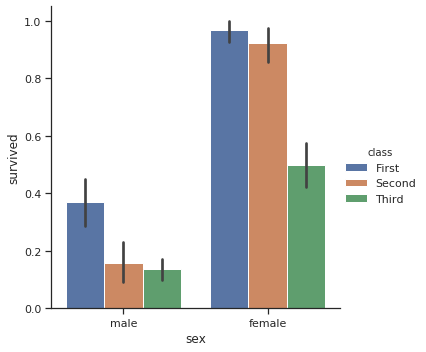

In [20]:
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic)


A special case for the bar plot is when you want to show the number of observations in each category rather than computing a statistic for a second variable. This is similar to a histogram over a categorical, rather than quantitative, variable.

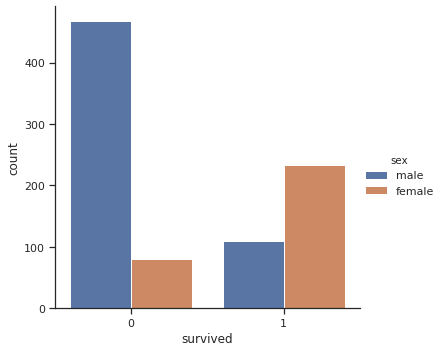

In [23]:
sns.catplot(x="survived",hue="sex", kind="count", data=titanic)

## Point plots

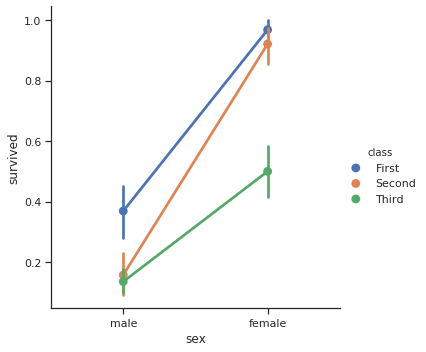

In [24]:
sns.catplot(x="sex", y="survived", hue="class", kind="point", data=titanic)

## Plotting “wide-form” data

In [27]:
iris = sns.load_dataset("iris")


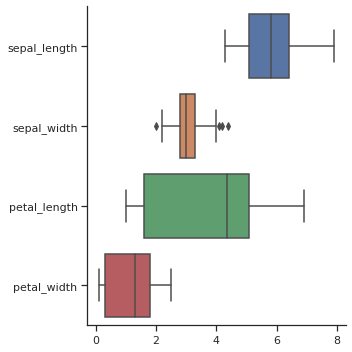

In [28]:
sns.catplot(data=iris, orient="h", kind="box")

## Showing multiple relationships with facets

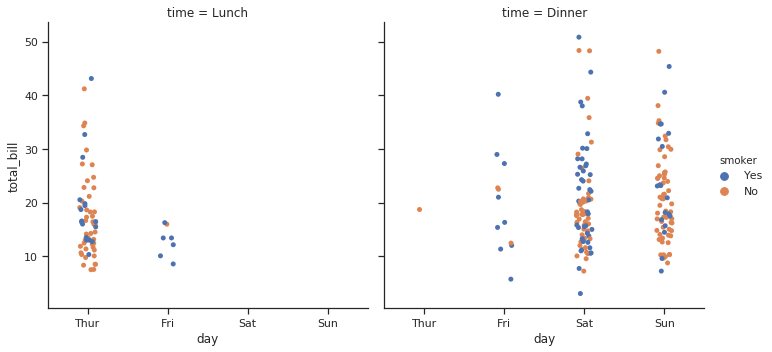

In [31]:
sns.catplot(x="day", y="total_bill", hue="smoker", col="time",data=tips)

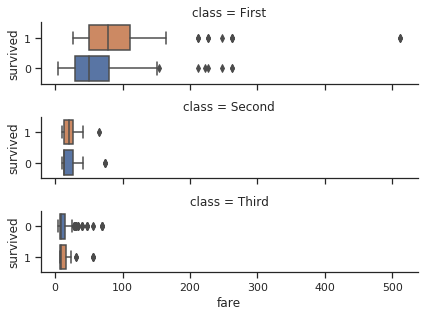

In [33]:
sns.catplot(x="fare", y="survived", row="class",
                kind="box", orient="h", height=1.5, aspect=4,
                data=titanic.query("fare > 0"))